<a href="https://colab.research.google.com/github/lim-jr/ESAA/blob/main/1107%EC%9B%94%EA%B3%BC%EC%A0%9C_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_%EC%99%84%EB%B2%BD%EA%B0%80%EC%9D%B4%EB%93%9C(183_227).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 01 분류

# 02 결정트리 개요

* 결정트리란, 데이터에 있는 규칙을/ 학습을 통해 자동으로 찾아내/ 트리 기반의 분류 규칙을 만드는 것  
* 적은 결정노드 + 높은 예측정확도 가지려면// 균일한 데이터 세트를 구성하도록/ 분할하게 하는/ 결정노드의 규칙을 정해야 함.
  - 결정노드는 정보 균일도가 높은 데이터 세트를 먼저 선택할 수 있도록 규칙조건을 만듦.
  - 균일도를 측정하는 기준(정보이득지수, 지니계수)을 이용해 데이터 세트를 분할한다. 
  - 정보이득지수가 높거나 지니계수가 낮은 조건을 찾아서/ 자식 트리 노드에 걸쳐 반복적으로 분할한 뒤/ 데이터가 모두 특정 분류에 분할되면// 분할을 멈추고 분류를 결정한다. 

## 1. 결정트리 모델의 특징 

* 장점 
  1. 쉽다. 직관적이다.
  2. 피처의 스케일링이나 정규화 같은 전처리 작업이 필요 없다.
  
* 단점  
  1. 과적합으로 알고리즘의 성능이 떨어진다.  
     완벽한 규칙을 만들지 못하는 경우가 많음에도 불구하고  
     정확도 높이기 위해 조건 추가-> 트리 깊이가 커져 학습모델이 복잡해짐-> 복잡한 모델은 유연한 대처할수 없어 예측성능이 떨어짐
  2. 이러한 한계를 인정하고,  
     트리의 크기를 사전에 제한하는 성능튜닝이 도움됨.

## 2. 결정트리 파라미터

1. min_samples_split  
  : 노드를 분할하기 위한 최소한의 샘플 데이터 수로 과적합을 제어하는데 사용됨  
2. min_samples_leaf  
  : 말단 노드(Leaf)가 되기 위한 최소한의 샘플 데이터 수
3. max_features  
  : 최적의 분할을 위해 고려할 최대 피쳐 개수. 
4. max_depth  
  : 트리의 최대 깊이를 규정 
5. max_leaf_nodes  
  : 말단 노드(Leaf)의 최대 개수

## 3. 결정트리 모델의 시각화

* Graphviz 설치
* Graphviz를 이용해 붓꽃 데이터셋에 결정 트리를 적용할 때 어떻게 서브 트리가 구성되고 만들어지는지 시각화해보자.

In [5]:
# 사이킷런은 결정트리 알고리즘인 DecisionTreeClassifier을 제공함.
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [6]:
# 우선 학습과 예측을 수행

# DecisionTree Classifier 생성
dt_clf = DecisionTreeClassifier(random_state=156)

# 붓꽃 데이터를 로딩하고, 학습과 테스트 데이터셋으로 분리
iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size=0.2, random_state=11)

# DecisionTreeClassifier 학습
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=156)

In [7]:
# 시각화하기 위한 준비

# export_graphviz는 Graphviz가 읽어들여서 그래프 형태로 시각화할 수 있는 출력 파일을 생성헤줌
from sklearn.tree import export_graphviz

# export_graphviz()의 호출결과로 out_file로 지정된 tree.dot 파일을 생성함.
export_graphviz(dt_clf, out_file="tree.dot", class_names=iris_data.target_names, 
                feature_names=iris_data.feature_names, impurity=True, filled=True)

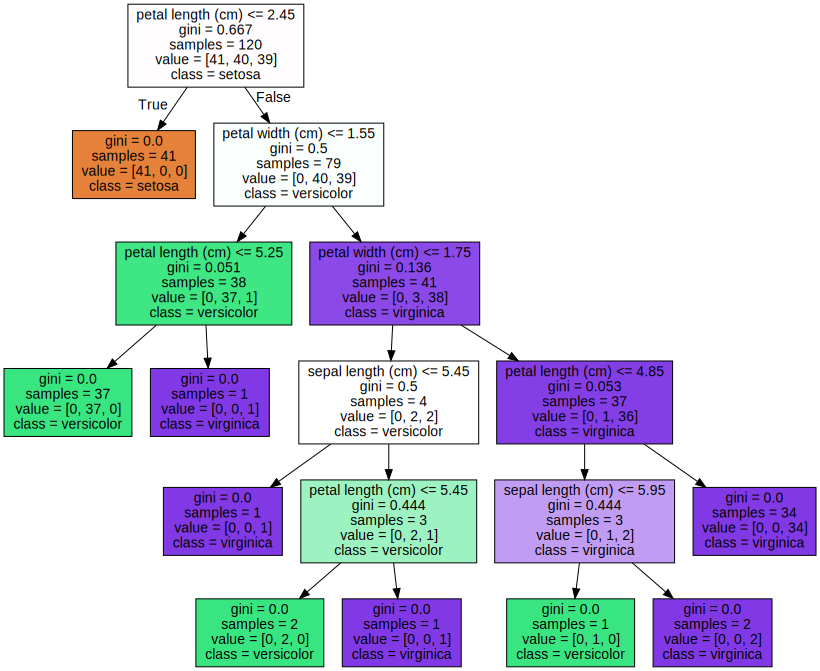

In [8]:
# 시각화하기

# 위에서 생성된 tree.dot파일을 Graphviz가 읽어서 결정트리의 규칙을 시각화
import graphviz
with open("tree.dot") as f:
  dot_graph = f.read()
graphviz.Source(dot_graph)

* 말단 리프노드  
  : 자식노드가 없는 노드

## 4. 결정트리 과적합

# 03 앙상블 학습 개요

## 1. 보팅 유형
  - 하드보팅과 소프트 보팅

## 2. 보팅 분류기

# 04 랜던 포레스트 개요

## 1. 랜덤포레스트 개요 및 실습


## 2. 랜덤 포레스트의 하이퍼 파라미터와 튜닝

# 05 GBM (Gradient Boosting Machine)

## 1. GBM의 개요 및 실습

## 2. GBM의 하이퍼 파라미터와 튜닝